In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('./data/titanic_clean.csv')

In [3]:
df.sample(4)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
77,0,3,male,28.0,0,0,8.0500,S
336,0,1,male,29.0,1,0,66.6000,S
155,0,1,male,51.0,0,1,61.3792,C
818,0,3,male,43.0,0,0,6.4500,S


In [5]:
df['Survived'].value_counts()

Survived
0    549
1    342
Name: count, dtype: int64

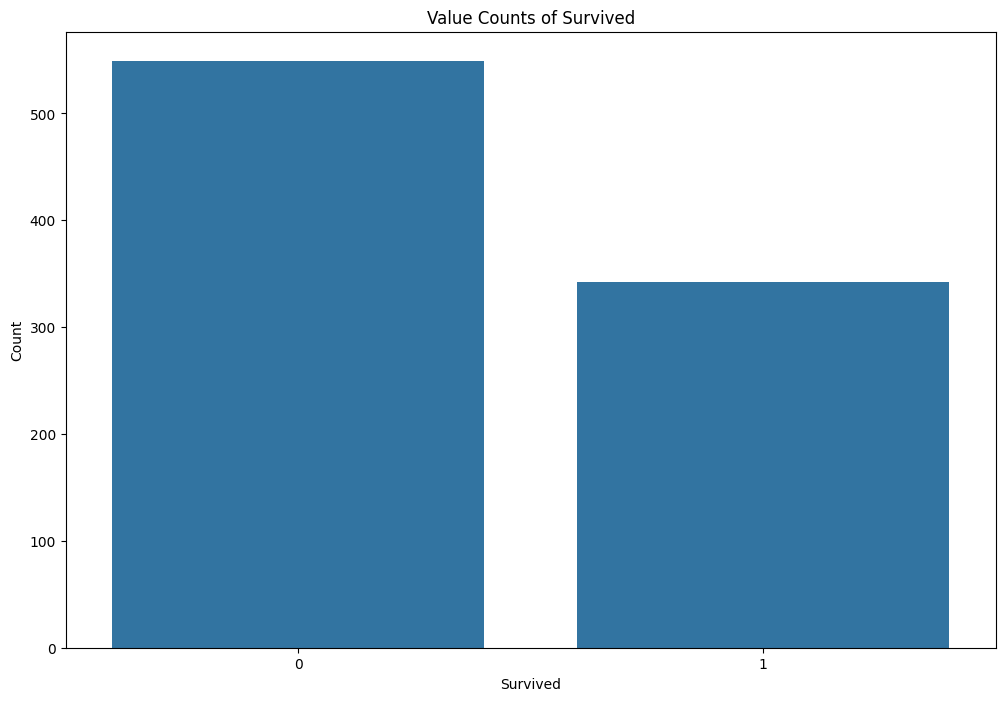

In [6]:
plt.figure(figsize=(12, 8))

sns.barplot(x = df['Survived'].value_counts().index, y = df['Survived'].value_counts())
plt.title('Value Counts of Survived')
plt.xlabel('Survived')
plt.ylabel('Count')
plt.show()

In [7]:
import pandas as pd # Asegúrate de que pandas está importado

# 1. Filtrar solo a los supervivientes (donde Survived == 1)
supervivientes_df = df[df['Survived'] == 1]

# 2. Agrupar por la columna 'Pclass' y contar la cantidad de filas
#    El .size() o .count() sobre cualquier columna después del groupby funcionaría
#    para obtener el conteo de supervivientes por clase.
conteo_por_clase = supervivientes_df.groupby('Pclass').size().reset_index(name='Sobrevivientes')

# O una forma más compacta, aprovechando que Survived es binario (1=sobrevivió, 0=no)
# Se agrupa por 'Pclass' y se suma la columna 'Survived'.
# La suma de los 1s (supervivientes) dará el total de supervivientes por grupo.
conteo_compacto = df.groupby('Pclass')['Survived'].sum().reset_index(name='Sobrevivientes')

print("Resultado (Usando Suma):")
print(conteo_compacto)

Resultado (Usando Suma):
   Pclass  Sobrevivientes
0       1             136
1       2              87
2       3             119


/tmp/ipykernel_1207/3874044584.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Pclass', y='Sobrevivientes', data=conteo_por_clase, palette='viridis')


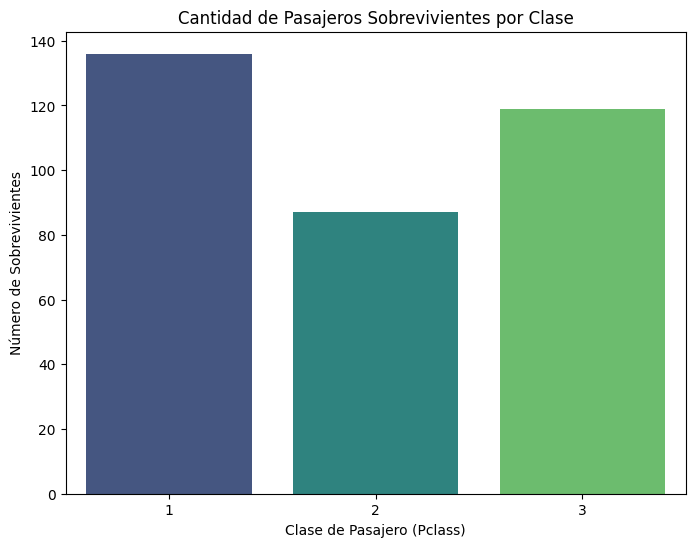

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Supongamos que tu DataFrame 'df' ya está cargado.

# 1. Calcular el número de sobrevivientes por clase (el mismo paso anterior)
conteo_por_clase = df.groupby('Pclass')['Survived'].sum().reset_index(name='Sobrevivientes')

# Asegurarse de que Pclass es categórica para una mejor visualización si es necesario
# Aunque no es estrictamente necesario, a menudo es una buena práctica.
conteo_por_clase['Pclass'] = conteo_por_clase['Pclass'].astype(str)

# 2. Crear el gráfico de barras
plt.figure(figsize=(8, 6)) # Define el tamaño de la figura

# Usaremos Seaborn (sns.barplot) por su estética y facilidad de uso
sns.barplot(x='Pclass', y='Sobrevivientes', data=conteo_por_clase, palette='viridis')

# Añadir títulos y etiquetas
plt.title('Cantidad de Pasajeros Sobrevivientes por Clase')
plt.xlabel('Clase de Pasajero (Pclass)')
plt.ylabel('Número de Sobrevivientes')
plt.xticks(rotation=0) # Mantiene las etiquetas del eje x horizontales

# Mostrar el gráfico
plt.show()

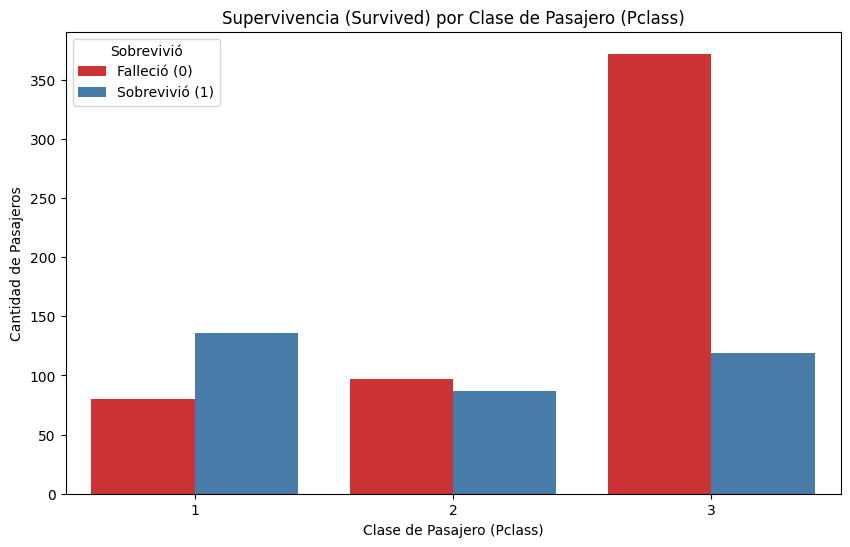

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))

# Usamos sns.countplot para mostrar los conteos de Survived (variable 'hue')
# dentro de cada Pclass (variable 'x').
sns.countplot(
    x='Pclass',
    hue='Survived',
    data=df,
    palette='Set1'
)

# Añadir títulos y etiquetas
plt.title('Supervivencia (Survived) por Clase de Pasajero (Pclass)')
plt.xlabel('Clase de Pasajero (Pclass)')
plt.ylabel('Cantidad de Pasajeros')

# Personalizar las etiquetas de la leyenda
legend_labels, _ = plt.gca().get_legend_handles_labels()
plt.legend(legend_labels, ['Falleció (0)', 'Sobrevivió (1)'], title='Sobrevivió')

plt.show()

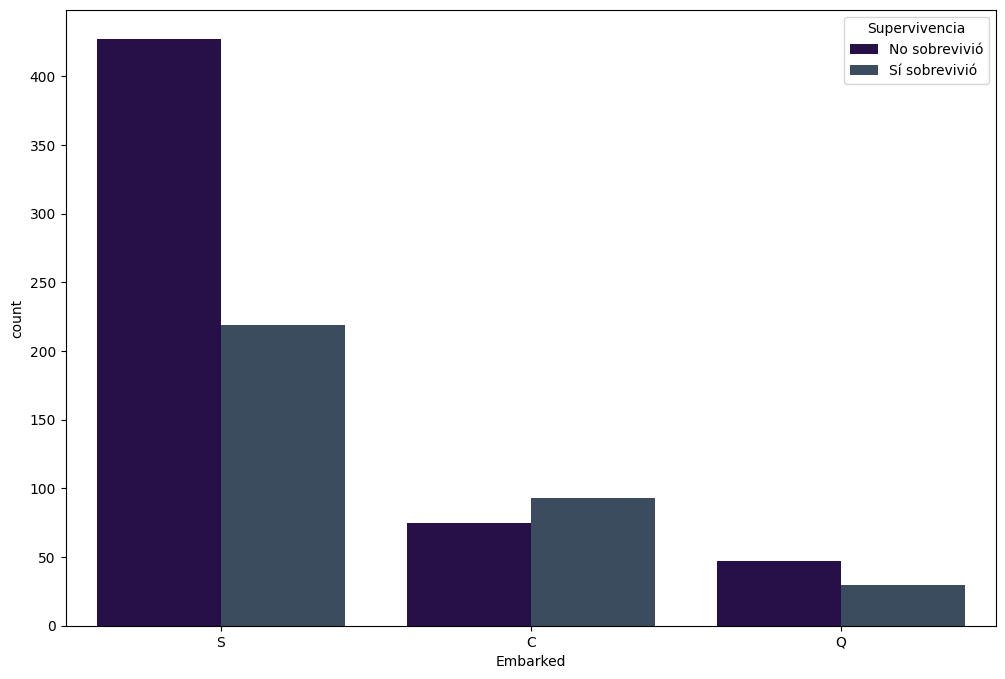

In [10]:
plt.figure(figsize = (12, 8))

# colores para cada una de las clases
color = ['#240750', '#344C64']

sns.countplot(df, x = 'Embarked', hue = 'Survived', palette=color) 
plt.legend(title = 'Supervivencia', labels = ['No sobrevivió', 'Sí sobrevivió'])
plt.show()

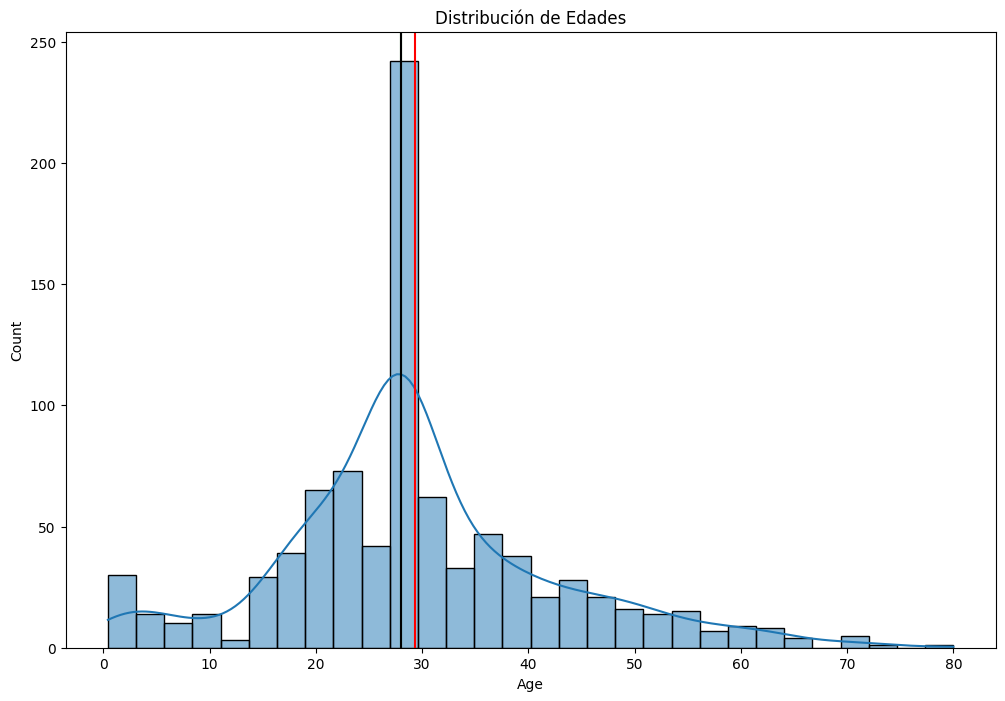

Media: 29.36158249158249
Mediana: 28.0
Moda: 28.0


In [11]:
plt.figure(figsize = (12, 8))

sns.histplot(df, x = 'Age', kde = True)
plt.title('Distribución de Edades')
plt.axvline(df['Age'].mean(), color = 'red')
plt.axvline(df['Age'].median(), color = 'green')
plt.axvline(df['Age'].mode()[0], color = 'black')
plt.show()

# Print the results
print(f"Media: {df['Age'].mean()}")
print(f"Mediana: {df['Age'].median()}")
print(f"Moda: {df['Age'].mode()[0]}")